In [103]:
import numpy as np
from scipy.optimize import minimize
from scipy.spatial import distance

np.set_printoptions(suppress=True)



speed_of_sound = 340  # 声速，单位：米/秒
def haversine_distance(lat1, lon1, lat2, lon2, elevation1, elevation2):
    R = 6371000  # 地球半径，单位：米
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    delta_lat = lat2 - lat1
    delta_lon = lon2 - lon1
    a = np.sin(delta_lat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta_lon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    horizontal_distance = R * c
    vertical_distance = elevation2 - elevation1
    distance = np.sqrt(horizontal_distance**2 + vertical_distance**2)
    return distance

def objective(x):
    residuals = []
    for i in range(len(coordinates)):
        for j in range(4):  # 四个音爆事件
            # x中包含所有音爆的经度、纬度、高程和时间
            index = 4 * j
            lon, lat, ele, t0 = x[index:index+4]
            dist = haversine_distance(lat, lon, coordinates[i, 1], coordinates[i, 0], ele, coordinates[i, 2])
            predicted_time = dist / speed_of_sound + t0
            residuals.append((predicted_time - times[i, j])**2)
    return sum(residuals)
from scipy.optimize import minimize, Bounds
from functools import partial
# 定义合理的高程和时间约束
    # 构建每对时间差不超过5秒的约束
def time_diff_constraint(x, i, j):
    return 5 - abs(x[4*i+3] - x[4*j+3])

In [104]:

# 输入数据：监测设备的坐标和音爆抵达时间
coordinates = np.array([
    [110.241, 27.204, 824],
    [110.783, 27.456, 727],
    [110.762, 27.785, 742],
    [110.251, 28.025, 850],
    [110.524, 27.617, 786],
    [110.467, 28.081, 678],
    [110.047, 27.521, 575]
])

times = np.array([
    [100.767, 164.229, 214.850, 270.065],
    [92.453, 112.220, 169.362, 196.583],
    [75.560, 110.696, 156.936, 188.020],
    [94.653, 141.409, 196.517, 258.985],
    [78.600, 86.216, 118.443, 126.669],
    [67.274, 166.270, 175.482, 266.871],
    [103.738, 163.024, 206.789, 210.306]
])
bounds = Bounds(
        [110, 27, 0, -200] * 4,  # 每个参数的下界
        [111, 29, 2000, 200] * 4  # 每个参数的上界
    )

    # 列表生成所有时间差约束
cons= ({'type': 'ineq', 'fun': partial(time_diff_constraint, i=i, j=j)} for i in range(4) for j in range(i+1, 4))
# 使用更精细的初始猜测
initial_guess = []
avg_time = np.mean(times, axis=1)  # 每个设备的平均记录时间作为参考
for j in range(4):  # 四个音爆
    # 使用数据中心位置和时间的平均值作为初始猜测
    mean_lon = np.mean(coordinates[:, 0])
    mean_lat = np.mean(coordinates[:, 1])
    mean_ele = np.mean(coordinates[:, 2])
    mean_time = np.mean(avg_time) +1 * j  
    initial_guess.extend([mean_lon, mean_lat, mean_ele, mean_time])
# 使用带约束的优化方法
result = minimize(
    objective, 
    initial_guess, 
    method='SLSQP',
    bounds=bounds,
    constraints=cons,
    options={'maxiter': 1000}
)
# 检查优化结果
if result.success:
    print("Optimization successful.")
    print("Optimized values:")
else:
    print("Optimization failed.")
    print("Reason:", result.message)
result.x

Optimization successful.
Optimized values:


array([110.53779996,  27.94783481, 740.28760802,  -2.94687516,
       110.53227339,  27.7133995 , 740.28571429,  -1.65106139,
       110.56092896,  28.20618503, 740.28392525,  -1.30645487,
       110.73513878,  27.35342774, 740.28795334,  -0.17324655])

In [137]:
coordinates = np.array([
    [110.241, 27.204, 824],
    [110.783, 27.456, 727],
    [110.762, 27.785, 742],
    [110.251, 28.025, 850],
    [110.524, 27.617, 786],
    [110.467, 28.081, 678],
    [110.047, 27.521, 575]
])
times = np.array([
    [100.767, 164.229, 214.850, 270.065],
    [92.453, 112.220, 169.362, 196.583],
    [75.560, 110.696, 156.936, 188.020],
    [94.653, 141.409, 196.517, 258.985],
    [78.600, 86.216, 118.443, 126.669],
    [67.274, 166.270, 175.482, 266.871],
    [103.738, 163.024, 206.789, 210.306]
])
bounds = Bounds(
        [110, 27, 0, -200] * 4,  # 每个参数的下界
        [111, 29, 2000, 200] * 4  # 每个参数的上界
    )

    # 列表生成所有时间差约束
cons= ({'type': 'ineq', 'fun': partial(time_diff_constraint, i=i, j=j)} for i in range(4) for j in range(i+1, 4))
    

        # 使用更精细的初始猜测
        # Add random error between 0 and 0.5 to each element in the array
error = np.random.uniform(0, 0.5, size=times.shape)
times_with_error = times + error
 


In [138]:
def objective(x):
    residuals = []
    for i in range(len(coordinates)):
        for j in range(4):  # 四个音爆事件
            # x中包含所有音爆的经度、纬度、高程和时间
            index = 4 * j
            lon, lat, ele, t0 = x[index:index+4]
            dist = haversine_distance(lat, lon, coordinates[i, 1], coordinates[i, 0], ele, coordinates[i, 2])
            predicted_time = dist / speed_of_sound + t0
            residuals.append((predicted_time - times_with_error[i, j])**2)
    return sum(residuals)
# 使用更精细的初始猜测
initial_guess = []
avg_time = np.mean(times_with_error, axis=1)  # 每个设备的平均记录时间作为参考
for j in range(4):  # 四个音爆
    # 使用数据中心位置和时间的平均值作为初始猜测
    mean_lon = np.mean(coordinates[:, 0])
    mean_lat = np.mean(coordinates[:, 1])
    mean_ele = np.mean(coordinates[:, 2])
    mean_time = np.mean(avg_time) +1 * j  
    initial_guess.extend([mean_lon, mean_lat, mean_ele, mean_time])
# 使用带约束的优化方法
result = minimize(
    objective, 
    initial_guess, 
    method='SLSQP',
    bounds=bounds,
    constraints=cons,
    options={'maxiter': 1000}
)
# 检查优化结果
if result.success:
    print("Optimization successful.")
    print("Optimized values:")
else:
    print("Optimization failed.")
    print("Reason:", result.message)
result.x    
    

Optimization successful.
Optimized values:


array([110.70463875,  28.2993354 , 740.28571429, -13.35975388,
       110.70463875,  27.35285322, 740.28571429, -12.83299497,
       110.70463875,  28.2993354 , 740.28756288, -12.30623606,
       110.70463875,  27.35285322, 740.28386569, -11.77947714])

In [76]:
Optimization successful.
Optimized values:
array([110.53779996,  27.94783481, 740.28760802,  -2.94687516,
       110.53227339,  27.7133995 , 740.28571429,  -1.65106139,
       110.56092896,  28.20618503, 740.28392525,  -1.30645487,
       110.73513878,  27.35342774, 740.28795334,  -0.17324655])

Optimization successful.
Optimized values:


array([110.7048733 ,  28.29989181, 740.28756452, -13.48681095,
       110.7048733 ,  27.35257301, 740.28756452, -12.96047035,
       110.7048733 ,  28.29989181, 740.28756452, -12.43412974,
       110.7048733 ,  27.35257301, 740.28756452, -11.90778914])

In [181]:
allresult=[]
coordinates = np.array([
        [110.241, 27.204, 824],
        [110.783, 27.456, 727],
        [110.762, 27.785, 742],
        [110.251, 28.025, 850],
        [110.524, 27.617, 786],
        [110.467, 28.081, 678],
        [110.047, 27.521, 575]
    ]) 
times = np.array([
        [100.767, 164.229, 214.850, 270.065],
        [92.453, 112.220, 169.362, 196.583],
        [75.560, 110.696, 156.936, 188.020],
        [94.653, 141.409, 196.517, 258.985],
        [78.600, 86.216, 118.443, 126.669],
        [67.274, 166.270, 175.482, 266.871],
        [103.738, 163.024, 206.789, 210.306]
    ])
for kk in range(1000):
    temp=[]
    bounds = Bounds(
            [110, 27, 0, -200] * 4,  # 每个参数的下界
            [111, 29, 2000, 200] * 4  # 每个参数的上界
        )

        # 列表生成所有时间差约束
    cons= ({'type': 'ineq', 'fun': partial(time_diff_constraint, i=i, j=j)} for i in range(4) for j in range(i+1, 4))    
    error = np.random.uniform(0, 0.5, size=times.shape)
    times_with_error = times + error
    def objective(x):
        residuals = []
        for i in range(len(coordinates)):
            for j in range(4):  # 四个音爆事件
                # x中包含所有音爆的经度、纬度、高程和时间
                index = 4 * j
                lon, lat, ele, t0 = x[index:index+4]
                dist = haversine_distance(lat, lon, coordinates[i, 1], coordinates[i, 0], ele, coordinates[i, 2])
                predicted_time = dist / speed_of_sound + t0
                residuals.append((predicted_time - times_with_error[i, j])**2)
        return sum(residuals)
    # 使用更精细的初始猜测
    initial_guess = []
    avg_time = np.mean(times_with_error, axis=1)  # 每个设备的平均记录时间作为参考
    for j in range(4):  # 四个音爆
        # 使用数据中心位置和时间的平均值作为初始猜测
        mean_lon = np.mean(coordinates[:, 0])
        mean_lat = np.mean(coordinates[:, 1])
        mean_ele = np.mean(coordinates[:, 2])
        mean_time = np.mean(avg_time) +1 * j  
        initial_guess.extend([mean_lon, mean_lat, mean_ele, mean_time])
    # 使用带约束的优化方法
    result = minimize(
        objective, 
        initial_guess, 
        method='SLSQP',
        bounds=bounds,
        constraints=cons,
        options={'maxiter': 1000}
    )
    temp=list(result.x)

    bounds = Bounds(
            [110, 27, 0, -200] * 4,  # 每个参数的下界
            [111, 29, 2000, 200] * 4  # 每个参数的上界
        )

        # 列表生成所有时间差约束
    cons= ({'type': 'ineq', 'fun': partial(time_diff_constraint, i=i, j=j)} for i in range(4) for j in range(i+1, 4))


            # 使用更精细的初始猜测
            # Add random error between 0 and 0.5 to each element in the array
    error = np.random.uniform(0, 0.5, size=times.shape)
    times_with_error =times_with_error + error
    def objective(x):
        residuals = []
        for i in range(len(coordinates)):
            for j in range(4):  # 四个音爆事件
                # x中包含所有音爆的经度、纬度、高程和时间
                index = 4 * j
                lon, lat, ele, t0 = x[index:index+4]
                dist = haversine_distance(lat, lon, coordinates[i, 1], coordinates[i, 0], ele, coordinates[i, 2])
                predicted_time = dist / speed_of_sound + t0
                residuals.append((predicted_time - times_with_error[i, j])**2)
        return sum(residuals)
    # 使用更精细的初始猜测
    initial_guess = []
    avg_time = np.mean(times_with_error, axis=1)  # 每个设备的平均记录时间作为参考
    for j in range(4):  # 四个音爆
        # 使用数据中心位置和时间的平均值作为初始猜测
        mean_lon = np.mean(coordinates[:, 0])
        mean_lat = np.mean(coordinates[:, 1])
        mean_ele = np.mean(coordinates[:, 2])
        mean_time = np.mean(avg_time) +1 * j  
        initial_guess.extend([mean_lon, mean_lat, mean_ele, mean_time])
    # 使用带约束的优化方法
    result = minimize(
        objective, 
        initial_guess, 
        method='SLSQP',
        bounds=bounds,
        constraints=cons,
        options={'maxiter': 1000}
    )
    temp=temp+list(result.x)
    allresult.append(temp)


C:\Users\Stream\AppData\Roaming\spsspro\spsspro\lib\python\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [182]:
import pandas as pd

# 设置浮点显示格式，避免科学计数法
pd.set_option('display.float_format', '{:.8f}'.format)
allresult=pd.DataFrame(allresult)
allresult

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,110.70468203,28.29943807,740.28571429,-13.40847262,110.70468203,27.35280151,740.28571429,-12.88179090,110.70468203,28.29943807,...,740.28394400,-5.57721550,110.61171063,28.26811159,740.28394400,-5.03119794,110.62277009,27.43995946,740.28748457,-4.48513642
1,110.42496350,27.70257033,740.30149046,16.91530326,110.45159374,27.66425287,740.22420679,21.09138433,110.42201675,27.71206365,...,740.13723069,-17.03129277,110.60481374,27.91674585,740.43424827,-16.62990339,110.63486767,27.50893034,740.39166909,-16.22848300
2,110.42697800,27.70113626,740.27668129,21.22294326,110.45169425,27.66441272,740.26251653,21.22294330,110.42960146,27.71080679,...,740.30509393,21.11098600,110.41983290,27.71092685,740.28344485,22.23318189,110.99999986,27.57755939,740.31074375,22.23313109
3,110.59258054,27.87460370,740.31369633,-56.42227411,110.76695222,27.79527723,740.28557443,-55.49980549,110.80120888,28.13168760,...,740.28495076,-45.81040669,110.72325203,28.02174337,740.28677679,-46.36241946,110.72635689,27.32721360,740.28749847,-44.85596402
4,110.42453059,27.70295062,740.26330444,16.89456861,110.45173741,27.66488305,740.25967838,21.04230805,110.42163843,27.71236133,...,740.36614883,21.43773750,110.42970726,27.71113214,740.19777214,26.43774820,110.72927566,27.29341921,740.27059632,26.43774563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,110.42730337,27.70132802,740.27314335,21.12159110,110.45077865,27.66414701,740.27475724,21.12159116,110.42932041,27.71028024,...,740.25403648,21.23054838,110.42020922,27.71055371,740.49761022,22.16046723,111.00000000,27.57762711,740.87609858,22.16046705
996,110.55022258,28.01459661,740.28519008,-54.27653747,110.64875449,27.65573894,740.28957058,-53.86521658,110.76936650,28.01459661,...,740.52597012,21.55699189,110.43101203,27.71103078,740.27907580,26.55699276,110.72460320,27.29407441,740.43061445,26.55699236
997,110.58252756,28.23190690,740.28398383,-2.63928236,110.54389546,27.41279467,740.28744474,-2.08346222,110.57895892,28.25303223,...,740.47043898,21.31594546,110.42399011,27.71287961,740.45957474,22.20848707,110.99999998,27.57633977,740.05033529,22.20848680
998,110.65769653,28.27775402,740.28753095,-10.48244865,110.64215301,27.37461297,740.29116428,-9.94799043,110.65660223,28.28595065,...,740.28571429,-12.76984219,110.70472202,28.29953293,740.28941264,-12.24323179,110.70472202,27.35275374,740.28386511,-11.71662139


In [184]:
allresult.columns=['真实_残骸1经度',
 '真实_残骸1纬度',
 '真实_残骸1高程',
 '真实_残骸1音爆发生时间',
 '真实_残骸2经度',
 '真实_残骸2纬度',
 '真实_残骸2高程',
 '真实_残骸2音爆发生时间',
 '真实_残骸3经度',
 '真实_残骸3纬度',
 '真实_残骸3高程',
 '真实_残骸3音爆发生时间',
 '真实_残骸4经度',
 '真实_残骸4纬度',
 '真实_残骸4高程',
 '真实_残骸4音爆发生时间','噪声_残骸1经度',
 '噪声_残骸1纬度',
 '噪声_残骸1高程',
 '噪声_残骸1音爆发生时间',
 '噪声_残骸2经度',
 '噪声_残骸2纬度',
 '噪声_残骸2高程',
 '噪声_残骸2音爆发生时间',
 '噪声_残骸3经度',
 '噪声_残骸3纬度',
 '噪声_残骸3高程',
 '噪声_残骸3音爆发生时间',
 '噪声_残骸4经度',
 '噪声_残骸4纬度',
 '噪声_残骸4高程',
 '噪声_残骸4音爆发生时间']

In [185]:
allresult.to_csv('Q4_2.csv',index=None)

In [186]:
# 中文图表注释
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [220]:
X=allresult[['噪声_残骸1经度',
 '噪声_残骸1纬度',
 '噪声_残骸1高程',
 '噪声_残骸1音爆发生时间',
 '噪声_残骸2经度',
 '噪声_残骸2纬度',
 '噪声_残骸2高程',
 '噪声_残骸2音爆发生时间',
 '噪声_残骸3经度',
 '噪声_残骸3纬度',
 '噪声_残骸3高程',
 '噪声_残骸3音爆发生时间',
 '噪声_残骸4经度',
 '噪声_残骸4纬度',
 '噪声_残骸4高程',
 '噪声_残骸4音爆发生时间']]

Y=allresult['真实_残骸1经度']

In [188]:
allresult['真实_残骸1经度']

0     110.70468203
1     110.42496350
2     110.42697800
3     110.59258054
4     110.42453059
          ...     
995   110.42730337
996   110.55022258
997   110.58252756
998   110.65769653
999   110.70464661
Name: 真实_残骸1经度, Length: 1000, dtype: float64

线性回归评价结果：
MSE 0.012123060183374897
R^2 0.011567317847734349
决策树模型评价结果：
MSE 7.956286897577696e-15
R^2 0.9999999999993513
随机森林模型评价结果：
MSE 0.0018393774379532827
R^2 0.8500295513685727
支持向量机模型评价结果：
MSE 0.012255669136981378
R^2 0.0007552768524737852
神经网络模型评价结果：
MSE 3.139132589540153
R^2 -254.943730227938


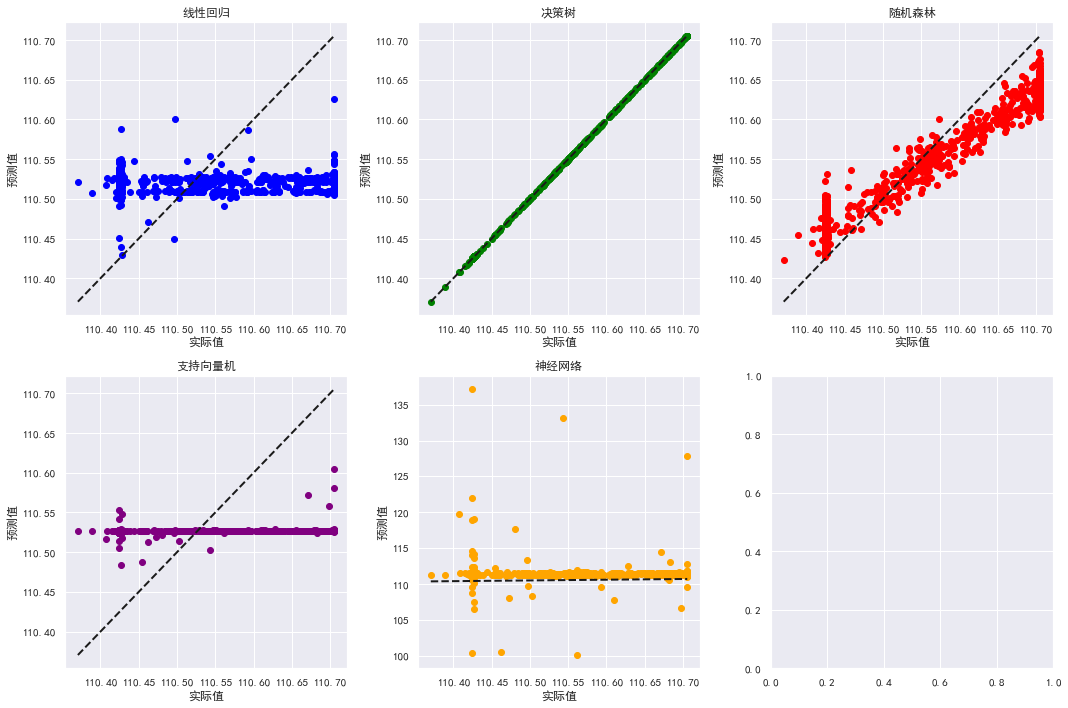

In [221]:


# 假设已经定义了 X, Y

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
LR_y_pred = model.predict(X)

# 输出线性回归模型评价结果
print('线性回归评价结果：')
# 计算均方误差和R^2评价
print("MSE", mean_squared_error(Y, LR_y_pred))
print("R^2", r2_score(Y, LR_y_pred))

axs[0][0].scatter(Y, LR_y_pred, color='blue')
axs[0][0].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
axs[0][0].set_xlabel('实际值')
axs[0][0].set_ylabel('预测值')
axs[0][0].set_title('线性回归')

# 构建决策树回归模型
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, Y)
tree_y_pred = tree_model.predict(X)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
# 计算均方误差和R^2评价
print("MSE", mean_squared_error(Y, tree_y_pred))
print("R^2", r2_score(Y, tree_y_pred))

axs[0][1].scatter(Y, tree_y_pred, color='green')
axs[0][1].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
axs[0][1].set_xlabel('实际值')
axs[0][1].set_ylabel('预测值')
axs[0][1].set_title('决策树')

# 构建随机森林回归模型
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, Y)
rf_y_pred = rf_model.predict(X)

# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
# 计算均方误差和R^2评价
print("MSE", mean_squared_error(Y, rf_y_pred))
print("R^2", r2_score(Y, rf_y_pred))

axs[0][2].scatter(Y, rf_y_pred, color='red')
axs[0][2].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
axs[0][2].set_xlabel('实际值')
axs[0][2].set_ylabel('预测值')
axs[0][2].set_title('随机森林')

# 构建支持向量机回归模型
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X, Y)
svm_y_pred = svm_model.predict(X)

# 输出支持向量机模型评价结果
print('支持向量机模型评价结果：')
# 计算均方误差和R^2评价
print("MSE", mean_squared_error(Y, svm_y_pred))
print("R^2", r2_score(Y, svm_y_pred))

axs[1][0].scatter(Y, svm_y_pred, color='purple')
axs[1][0].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
axs[1][0].set_xlabel('实际值')
axs[1][0].set_ylabel('预测值')
axs[1][0].set_title('支持向量机')

# 构建神经网络回归模型
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(random_state=42)
mlp_model.fit(X, Y)
mlp_y_pred = mlp_model.predict(X)

# 输出神经网络模型评价结果
print('神经网络模型评价结果：')
# 计算均方误差和R^2评价
print("MSE", mean_squared_error(Y, mlp_y_pred))
print("R^2", r2_score(Y, mlp_y_pred))

axs[1][1].scatter(Y, mlp_y_pred, color='orange')
axs[1][1].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
axs[1][1].set_xlabel('实际值')
axs[1][1].set_ylabel('预测值')
axs[1][1].set_title('神经网络')

plt.tight_layout()
plt.show()


In [193]:
import sys
!{sys.executable} -m pip install shap -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/7c/ff/ceb21b7559090adcf823b2e24cfaabbdce4f95e0f6bc9bdcd146968a14b6/shap-0.44.1-cp38-cp38-win_amd64.whl (450 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pyb.exe -m pip install --upgrade pip


In [194]:
import shap
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 初始化SHAP模型
explainer = shap.Explainer(tree_model)

# 计算SHAP值
shap_values = explainer(X)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [195]:
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

In [196]:
# 输出每个特征的SHAP值（绝对值）
features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)
aa=pd.DataFrame(features,columns=['features'])
aa['shap_values']=abs_mean_shap_values
aa.sort_values(by='shap_values', ascending=False)

,features,shap_values
4,噪声_残骸2经度,0.02352633
10,噪声_残骸3高程,0.02141300
5,噪声_残骸2纬度,0.01894758
8,噪声_残骸3经度,0.01331148
6,噪声_残骸2高程,0.01244959
2,噪声_残骸1高程,0.01128766
9,噪声_残骸3纬度,0.01121177
14,噪声_残骸4高程,0.01119423
15,噪声_残骸4音爆发生时间,0.00811206
11,噪声_残骸3音爆发生时间,0.00785188


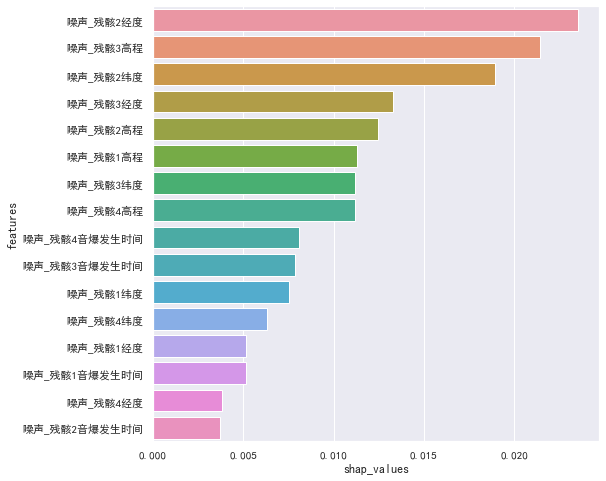

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.rcParams['font.sans-serif'] = ['SimHei']  
# Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus'] = False    
# 解决Matplotlib坐标轴负号'-'显示为方块的问题
sns.set(font='SimHei')                        
# Seaborn中设置字体-黑体，解决Seaborn中文乱码问题
a_sorted = aa.sort_values(by='shap_values', ascending=False)

# 设置图表大小，例如设置为宽10英寸，高6英寸
plt.figure(figsize=(8, 8))
# 使用Seaborn绘制柱状图
sns.barplot(x='shap_values', y='features', data=a_sorted.reset_index(), orient='h')

# 显示图形
plt.show()

In [199]:

# 初始化SHAP模型
explainer = shap.Explainer(tree_model)

shap.initjs() #初始化JS
shap_values = explainer.shap_values(X) #计算每个样本的每个特征的SHAP值

1


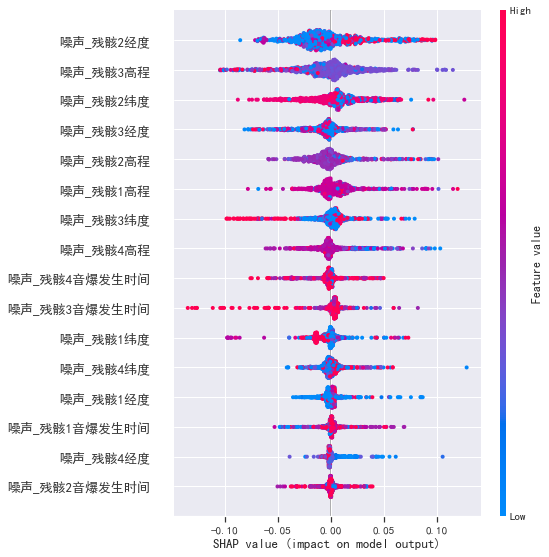

In [201]:
print(1)
shap.summary_plot(shap_values, X[X.columns])

In [225]:
Ys=['真实_残骸1经度',
 '真实_残骸1纬度',
 '真实_残骸1高程',
 '真实_残骸1音爆发生时间',
 '真实_残骸2经度',
 '真实_残骸2纬度',
 '真实_残骸2高程',
 '真实_残骸2音爆发生时间',
 '真实_残骸3经度',
 '真实_残骸3纬度',
 '真实_残骸3高程',
 '真实_残骸3音爆发生时间',
 '真实_残骸4经度',
 '真实_残骸4纬度',
 '真实_残骸4高程',
 '真实_残骸4音爆发生时间']

真实_残骸1经度
决策树模型评价结果：
MSE 7.956286897577696e-15
R^2 0.9999999999993513


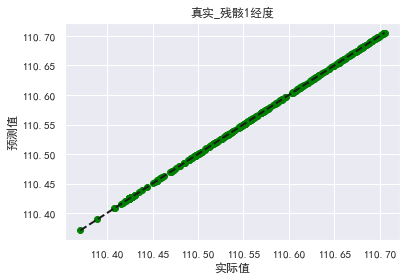

真实_残骸1纬度
决策树模型评价结果：
MSE 4.499568975020061e-16
R^2 0.9999999999999933


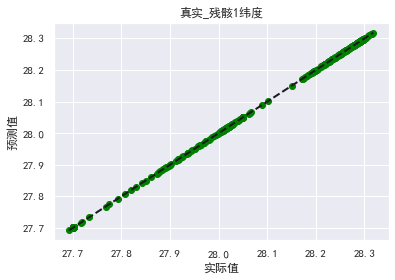

真实_残骸1高程
决策树模型评价结果：
MSE 1.0325206865524663e-12
R^2 0.9999999999999941


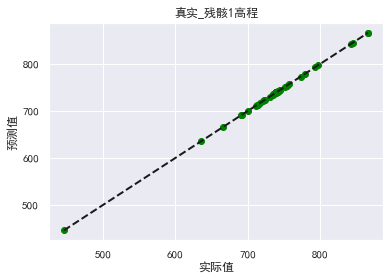

真实_残骸1音爆发生时间
决策树模型评价结果：
MSE 0.0
R^2 1.0


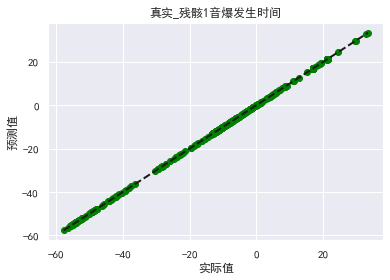

真实_残骸2经度
决策树模型评价结果：
MSE 1.0390011412826323e-14
R^2 0.9999999999991067


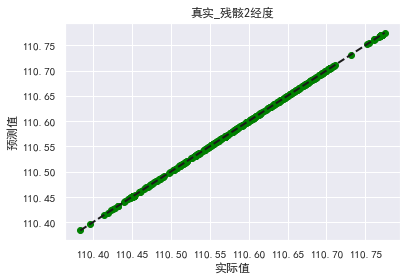

真实_残骸2纬度
决策树模型评价结果：
MSE 1.3570962361705582e-13
R^2 0.9999999999939857


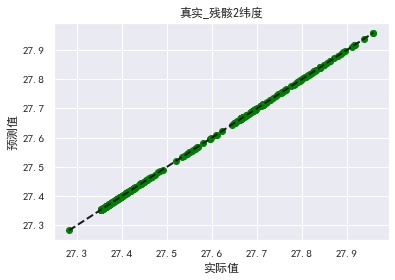

真实_残骸2高程
决策树模型评价结果：
MSE 2.756093921750907e-12
R^2 0.9999999999999992


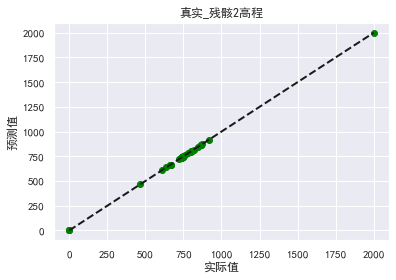

真实_残骸2音爆发生时间
决策树模型评价结果：
MSE 0.0
R^2 1.0


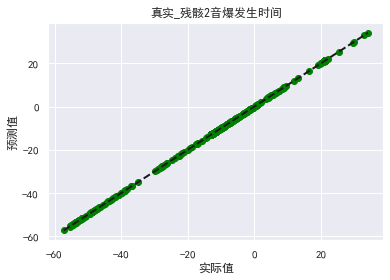

真实_残骸3经度
决策树模型评价结果：
MSE 1.1898880622830426e-14
R^2 0.9999999999992991


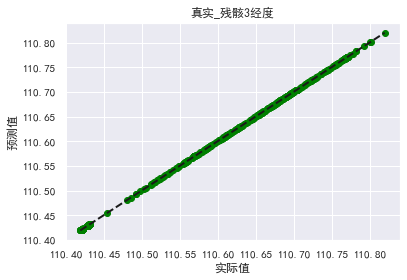

真实_残骸3纬度
决策树模型评价结果：
MSE 4.769100952144425e-17
R^2 0.9999999999999993


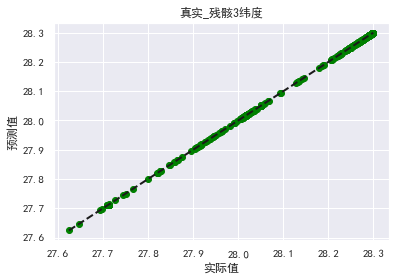

真实_残骸3高程
决策树模型评价结果：
MSE 7.495574486862652e-13
R^2 0.9999999999999999


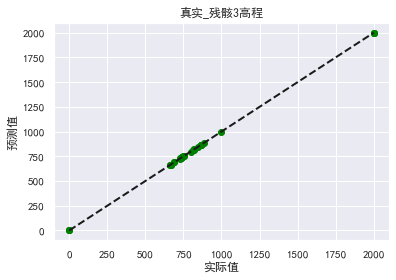

真实_残骸3音爆发生时间
决策树模型评价结果：
MSE 0.0
R^2 1.0


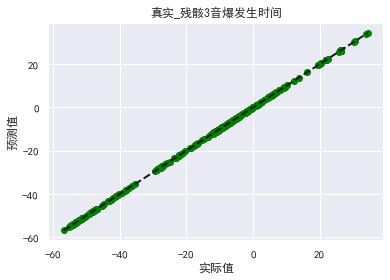

真实_残骸4经度
决策树模型评价结果：
MSE 1.890631927076541e-14
R^2 0.99999999999891


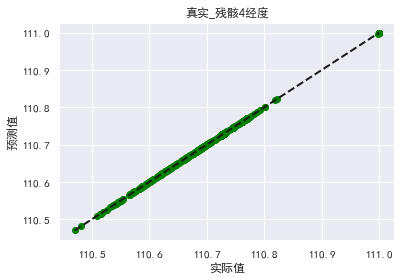

真实_残骸4纬度
决策树模型评价结果：
MSE 3.9768443636593334e-16
R^2 0.9999999999999697


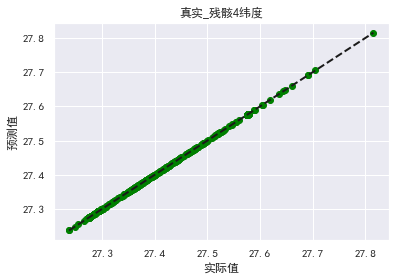

真实_残骸4高程
决策树模型评价结果：
MSE 7.896845043265435e-13
R^2 0.9999999999999998


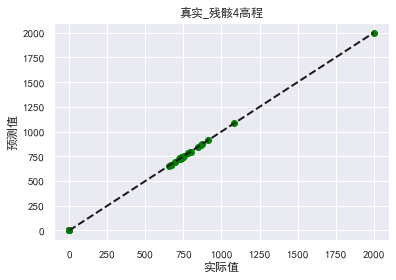

真实_残骸4音爆发生时间
决策树模型评价结果：
MSE 0.0
R^2 1.0


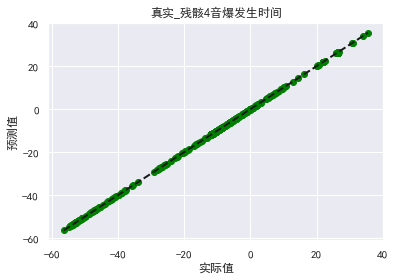

In [229]:
for i in Ys:
    print(i)
    Y=allresult[i]
    tree_model = DecisionTreeRegressor(random_state=42)
    tree_model.fit(X, Y)
    tree_y_pred = tree_model.predict(X)

    # 输出决策树模型评价结果
    print('决策树模型评价结果：')
    # 计算均方误差和R^2评价
    print("MSE", mean_squared_error(Y, tree_y_pred))
    print("R^2", r2_score(Y, tree_y_pred))

    plt.scatter(Y, tree_y_pred, color='green')
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
    plt.xlabel('实际值')
    plt.ylabel('预测值')
    plt.title(i)
    plt.show()
    